In [1]:
import  pandas  as pd

In [3]:
df_raw = pd.read_excel('../data/raw/panel_data.xlsx')

In [4]:
df = df_raw[[u'cid', u'code', u'name', u'year','GDPpc_KD ($2000)']]

In [5]:
df.columns = [u'cid', u'code', u'name', u'year','gdp_pc_KD_var']

In [6]:
df.head()

,cid,code,name,year,gdp_pc_KD_var
0,afg,1,Afghanistan,1963,94.306115
1,afg,1,Afghanistan,1964,76.957127
2,afg,1,Afghanistan,1965,94.863896
3,afg,1,Afghanistan,1966,129.217960
4,afg,1,Afghanistan,1967,151.254586


In [7]:
df_afg = df[df['cid'] == 'afg']

In [8]:
df_afg.index = df_afg['year']
df_afg['gdp_pc_KD_var'].plot()

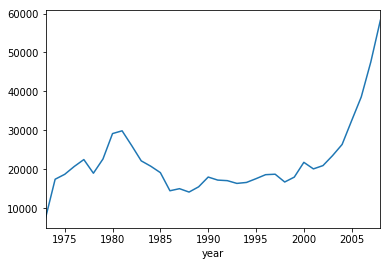

In [9]:
df_are = df[df['cid'] == 'are']

df_are.index = df_afg['year']
df_are = df_are.dropna()
df_are['gdp_pc_KD_var'].plot()

In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose

d:\tools\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [12]:
import statsmodels.api as sm

In [57]:
result = seasonal_decompose(df_are['gdp_pc_KD_var'].values,model='multiplicative',freq= 3)

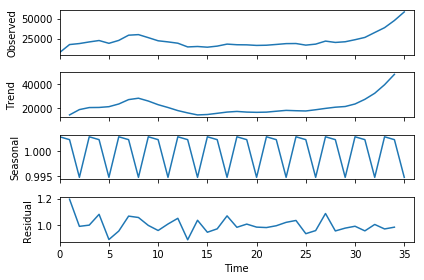

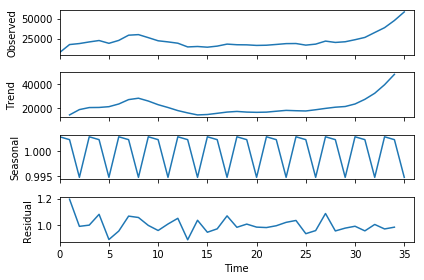

In [58]:
result.plot()

In [13]:
mod_uc = sm.tsa.UnobservedComponents(
    df_are['gdp_pc_KD_var'], 'rwalk',
    cycle=True, stochastic_cycle=True, damped_cycle=True,
)

D:\Conda\envs\p3env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [15]:
res_uc = mod_uc.fit(method='powell', disp=False)

In [16]:
res_uc = mod_uc.fit(res_uc.params, disp=False)

In [17]:
print(res_uc.summary())

                            Unobserved Components Results                            
Dep. Variable:                 gdp_pc_KD_var   No. Observations:                   36
Model:                           random walk   Log Likelihood                -316.427
                   + damped stochastic cycle   AIC                            640.853
Date:                       Mon, 16 Sep 2019   BIC                            646.840
Time:                               20:13:35   HQIC                           642.868
Sample:                                    0                                         
                                        - 36                                         
Covariance Type:                         opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
sigma2.level     1.257e+07   3.15e+04    399.312      0.00

In [20]:
res_uc.level.smoothed

array([ 4397.0539854 , 17343.50079997, 21364.69406465, 20521.97304624,
       20329.81075302, 19459.79746229, 24429.16573721, 28587.67224938,
       28482.26565978, 26780.74853483, 23279.34021244, 20106.3084192 ,
       18325.08039027, 15186.24286424, 15654.03799126, 13526.11999554,
       15080.70441079, 18617.61115349, 17534.62986915, 16569.6830212 ,
       16214.15782049, 17105.67376219, 17698.07903052, 18231.18462221,
       18722.77388141, 17092.69472537, 17990.19628119, 21518.27692952,
       20167.14240739, 21196.07908736, 23454.72300129, 26205.19679344,
       32606.13566799, 38725.53253352, 47480.40718862, 58161.89748211])

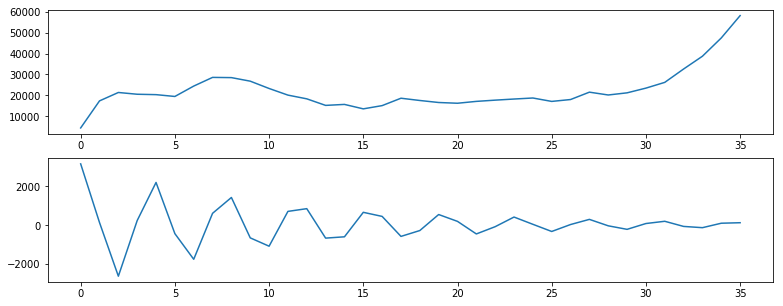

In [24]:
fig, axes = plt.subplots(2, figsize=(13,5));
axes[0].plot(res_uc.level.smoothed)
axes[1].plot(res_uc.cycle.smoothed)

In [25]:
endog = df_are['gdp_pc_KD_var']
hp_cycle, hp_trend = sm.tsa.filters.hpfilter(endog)

In [32]:
df_are['gdp_pc_KD_var']

year
1973     7535.180718
1974    17462.554750
1975    18724.485780
1976    20744.274380
1977    22511.786560
1978    19007.753050
1979    22658.608260
1980    29181.780980
1981    29891.265000
1982    26111.857570
1983    22181.977090
1984    20799.773100
1985    19158.699120
1986    14504.374940
1987    15039.682050
1988    14171.550620
1989    15516.044380
1990    18024.494880
1991    17242.695230
1992    17101.542430
1993    16393.573140
1994    16638.787620
1995    17604.887360
1996    18633.194130
1997    18751.731890
1998    16752.799810
1999    18007.409530
2000    21800.570580
2001    20118.320540
2002    20965.834780
2003    23523.645760
2004    26389.440200
2005    32526.003140
2006    38581.145180
2007    47565.059450
2008    58272.385920
Name: gdp_pc_KD_var, dtype: float64

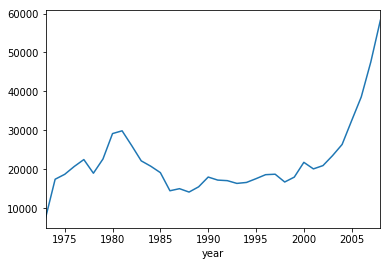

In [33]:
df_are['gdp_pc_KD_var'].plot()

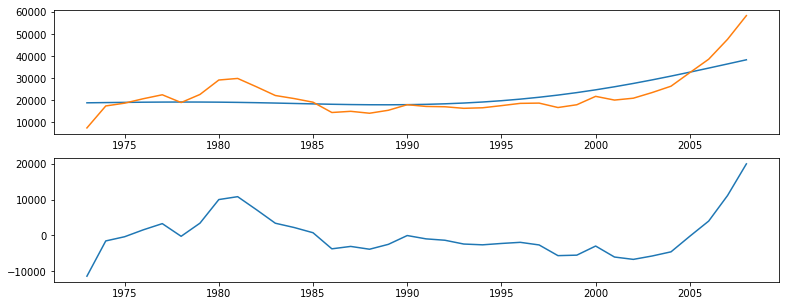

In [29]:
fig, axes = plt.subplots(2, figsize=(13,5));
axes[0].plot(hp_trend,label='UC')
axes[0].plot(endog,label='agg')
axes[1].plot(hp_cycle)

In [30]:
mod_ucarima = sm.tsa.UnobservedComponents(endog, 'rwalk', autoregressive=4)
# Here the powell method is used, since it achieves a
# higher loglikelihood than the default L-BFGS method
res_ucarima = mod_ucarima.fit(method='powell', disp=False)
print(res_ucarima.summary())

D:\Conda\envs\p3env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                        Unobserved Components Results                         
Dep. Variable:          gdp_pc_KD_var   No. Observations:                   36
Model:                    random walk   Log Likelihood                -330.648
                              + AR(4)   AIC                            673.296
Date:                Mon, 16 Sep 2019   BIC                            682.628
Time:                        20:22:16   HQIC                           676.517
Sample:                             0                                         
                                 - 36                                         
Covariance Type:                  opg                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
sigma2.level  1026.0974   2344.402      0.438      0.662   -3568.845    5621.040
sigma2.ar       9.1e+06      0.549   1.66e+07 

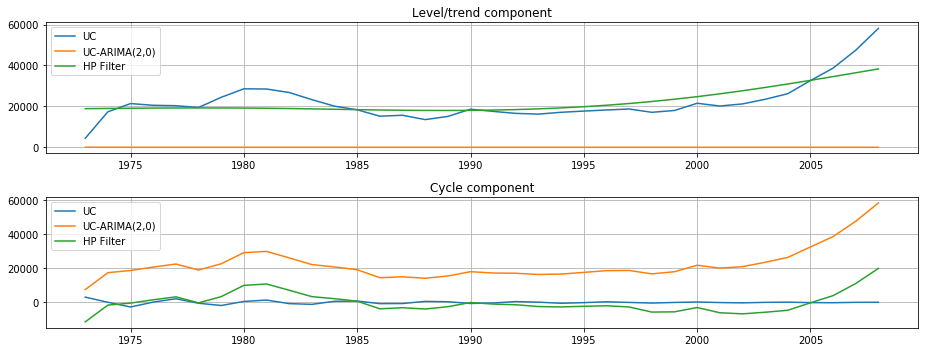

In [31]:
fig, axes = plt.subplots(2, figsize=(13,5));
axes[0].set(title='Level/trend component')
axes[0].plot(endog.index, res_uc.level.smoothed, label='UC')
axes[0].plot(endog.index, res_ucarima.level.smoothed, label='UC-ARIMA(2,0)')
axes[0].plot(hp_trend, label='HP Filter')
axes[0].legend(loc='upper left')
axes[0].grid()

axes[1].set(title='Cycle component')
axes[1].plot(endog.index, res_uc.cycle.smoothed, label='UC')
axes[1].plot(endog.index, res_ucarima.autoregressive.smoothed, label='UC-ARIMA(2,0)')
axes[1].plot(hp_cycle, label='HP Filter')
axes[1].legend(loc='upper left')
axes[1].grid()

fig.tight_layout();